<a href="https://colab.research.google.com/github/DsStudentSid/DL-Assignments/blob/master/Melanoma_Tumor_Size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Table of Content**

To train a model using TF-Keras library and predict the melanoma tumor size

**Melanoma Tumor Size Dataset **

2.1 Get the Data

2.2 Clean the Data

2.3 Split the Data into Train and Test

2.4 Inspect the Data

2.5 Split Features from Labels

2.6 Normalize the Data

**The Model**

3.1 Build the Model

3.2 Inspect the Model

3.3 Train the Model

3.4 Make Predictions

**Model Tuning**

4.1 Increasing the Number of Hidden Layers and Hidden Units

4.2 Weight Regularization

4.3 Dropout

4.4 Combined L2 + Dropout

4.5 Batch Normalization

**Conclusion**

In [1]:
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.3.0


In [1]:
!pip install pandas_profiling==2.5.0

     |████████████████████████████████| 194kB 2.5MB/s 
     |████████████████████████████████| 10.4MB 6.7MB/s 
     |████████████████████████████████| 133kB 47.5MB/s 
     |████████████████████████████████| 614kB 43.4MB/s 
     |████████████████████████████████| 1.5MB 49.2MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 276kB 45.8MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 327kB 50.2MB/s 
     |████████████████████████████████| 102kB 11.7MB/s 
     |████████████████████████████████| 215kB 50.7MB/s 
     |████████████████████████████████| 747kB 46.5MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.5.0-py2.py3-none-any.whl size=241329 sha256=cfe497cf1700685a2899953fc93ad8f226166810d7dd9e02eeb1206f8d26b

In [3]:
import pathlib

import numpy as np
import pandas as pd
import pandas_profiling as p_p

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(rc={'figure.figsize':(12,10)})

!pip freeze |grep pandas-profiling


pandas-profiling==2.5.0


In [4]:
df_melanoma = pd.read_csv('https://raw.githubusercontent.com/DsStudentSid/DL-Assignments/master/melanoma_tumor_size.csv')
df_melanoma.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


In [5]:
df_melanoma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
mass_npea         9146 non-null float64
size_npear        9146 non-null float64
malign_ratio      9146 non-null float64
damage_size       9146 non-null float64
exposed_area      9146 non-null float64
std_dev_malign    9146 non-null float64
err_malign        9146 non-null float64
malign_penalty    9146 non-null int64
damage_ratio      9146 non-null float64
tumor_size        9146 non-null float64
dtypes: float64(9), int64(1)
memory usage: 714.7 KB


In [6]:
df_melanoma.isna().sum()

mass_npea         0
size_npear        0
malign_ratio      0
damage_size       0
exposed_area      0
std_dev_malign    0
err_malign        0
malign_penalty    0
damage_ratio      0
tumor_size        0
dtype: int64

* We have total 9146 data records. no NULL values in any column. No catagorical records. entire dataset is continous numeric (float & int)

In [7]:
df_melanoma.nunique()


mass_npea         8847
size_npear        8859
malign_ratio      7386
damage_size       8861
exposed_area      8949
std_dev_malign    8802
err_malign        8831
malign_penalty     315
damage_ratio      8641
tumor_size        6511
dtype: int64

* just by looking at above numbers it feels that data is highlight co-related

In [8]:
df_melanoma.describe()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
count,9146.000000,9146.000000,9146.000000,9146.000000,9.146000e+03,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000
mean,9903.052174,3032.827837,0.303083,103.902118,1.372442e+06,146.304239,3992.936256,69.849661,34.461652,7.723348
std,4060.577116,1462.334147,0.062533,55.456862,5.646773e+05,70.512177,1780.672859,55.785332,5.972808,6.086852
min,2864.760000,510.530000,0.114820,10.310100,3.878534e+05,31.970400,1089.190000,0.000000,15.228000,0.000000
25%,6988.420000,1983.657500,0.259053,64.012525,9.596873e+05,95.853900,3177.682500,31.000000,30.290225,2.320000
50%,8895.965000,2684.330000,0.301055,88.458300,1.237057e+06,126.138500,3846.320000,54.000000,35.245750,5.060500
75%,12119.950000,3830.745000,0.343002,134.209000,1.693083e+06,182.251500,4664.577500,91.000000,38.806075,13.336000
max,36995.400000,13535.000000,0.525300,346.420000,4.978616e+06,528.890000,91983.700000,340.000000,46.546400,20.999000


In [9]:
report = p_p.ProfileReport(df_melanoma)
#covert profile report as html file
report.to_file("Melanoma-EDA.html")


* EDA

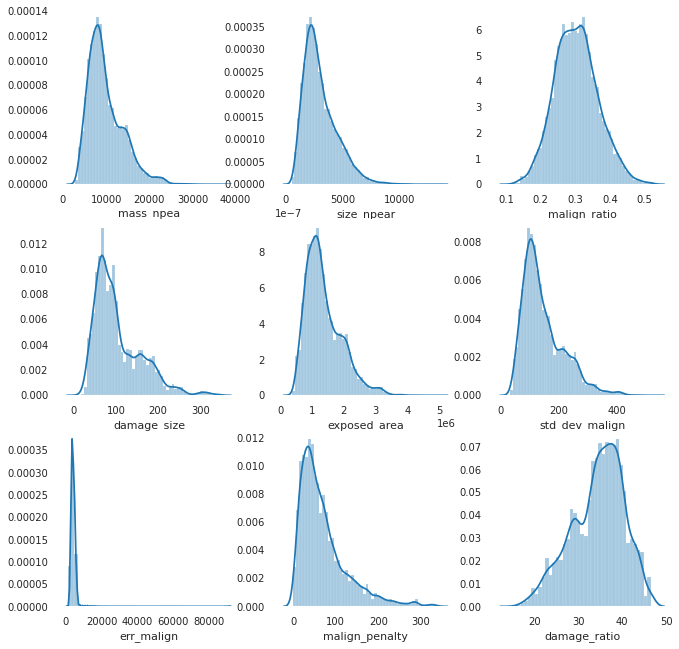

In [10]:

plt.figure(figsize=(11,11))
plt.subplot(3,3,1)
sns.distplot(df_melanoma.mass_npea)
plt.subplot(3,3,2)
sns.distplot(df_melanoma.size_npear)
plt.subplot(3,3,3)
sns.distplot(df_melanoma.malign_ratio)
plt.subplot(3,3,4)
sns.distplot(df_melanoma.damage_size)
plt.subplot(3,3,5)
sns.distplot(df_melanoma.exposed_area)
plt.subplot(3,3,6)
sns.distplot(df_melanoma.std_dev_malign)
plt.subplot(3,3,7)
sns.distplot(df_melanoma.err_malign)
plt.subplot(3,3,8)
sns.distplot(df_melanoma.malign_penalty)
plt.subplot(3,3,9)
sns.distplot(df_melanoma.damage_ratio)

* Correlation Matrix

In [11]:
corr = df_melanoma.corr()

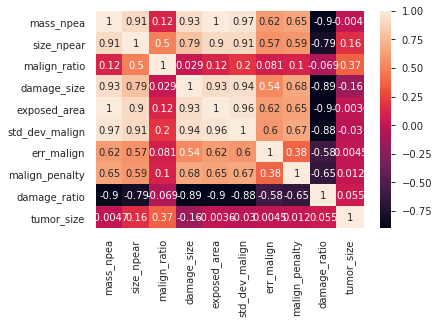

In [12]:
sns.heatmap(corr, annot=True)


#Transformation

In [13]:
df_melanoma.size_npear=np.log1p(df_melanoma.size_npear)
size=np.log1p(df_melanoma.size_npear)

df_melanoma.mass_npea=np.sqrt(df_melanoma.mass_npea)
df_melanoma.malign_ratio=np.log1p(df_melanoma.malign_ratio)
df_melanoma.damage_size=np.sqrt(df_melanoma.damage_size)
df_melanoma.exposed_area=np.sqrt(df_melanoma.exposed_area)
df_melanoma.std_dev_malign=np.log1p(df_melanoma.std_dev_malign)
df_melanoma.malign_penalty=np.sqrt(df_melanoma.malign_penalty)

# Feature Engineering

In [14]:
df_melanoma["mp/me"] = df_melanoma.malign_penalty / df_melanoma.err_malign
df_melanoma["massnpea/exposed_area"] = df_melanoma.mass_npea / df_melanoma.exposed_area
df_melanoma["massnpea/mstd"] = df_melanoma.mass_npea / df_melanoma.std_dev_malign
df_melanoma["merror/mstd"] = df_melanoma.err_malign / df_melanoma.std_dev_malign
df_melanoma["mea*ds"] = df_melanoma["massnpea/exposed_area"] * df_melanoma.damage_size
df_melanoma["mea_sqrt"] = np.sqrt(df_melanoma["massnpea/exposed_area"])
df_melanoma["mdr-mr"] = df_melanoma.damage_ratio - df_melanoma.malign_ratio
df_melanoma["mea*pe"] = df_melanoma["massnpea/exposed_area"] * df_melanoma["mp/me"]
df_melanoma["mea*masstd"] = df_melanoma["massnpea/exposed_area"] * df_melanoma["massnpea/mstd"]
df_melanoma["mr+mstd"] = df_melanoma.malign_ratio + df_melanoma.std_dev_malign
df_melanoma["dr-mstd"] = df_melanoma.damage_ratio - df_melanoma.std_dev_malign
df_melanoma["mas-mr"] = df_melanoma["mea*ds"] - df_melanoma.malign_ratio

In [15]:
df_melanoma.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size,mp/me,massnpea/exposed_area,massnpea/mstd,merror/mstd,mea*ds,mea_sqrt,mdr-mr,mea*pe,mea*masstd,mr+mstd,dr-mstd,mas-mr
0,83.252027,7.979346,0.351473,7.199292,994.399018,4.704898,2758.76,8.485281,39.3620,14.103,0.003076,0.083721,17.694758,586.359168,0.602732,0.289346,39.010527,0.000258,1.481422,5.056371,34.657102,0.251258
1,125.042793,8.492974,0.271598,14.951589,1434.721681,5.520985,5952.53,15.491933,22.0253,2.648,0.002603,0.087155,22.648639,1078.164532,1.303102,0.295220,21.753702,0.000227,1.973936,5.792583,16.504315,1.031503
2,101.863634,7.868973,0.224670,11.284370,1197.779654,5.081982,4635.26,8.544004,29.9963,1.688,0.001843,0.085044,20.044077,912.096924,0.959665,0.291623,29.771630,0.000157,1.704623,5.306652,24.914318,0.734994
3,114.428143,8.414287,0.295978,12.467558,1346.177991,5.159142,5273.87,5.656854,28.1354,3.796,0.001073,0.085002,22.179687,1022.237905,1.059770,0.291551,27.839422,0.000091,1.885323,5.455119,22.976258,0.763793
4,86.863168,7.966712,0.323539,9.226251,1021.722810,4.831620,3263.35,7.549834,35.0200,18.023,0.002314,0.085016,17.978062,675.415248,0.784382,0.291576,34.696461,0.000197,1.528430,5.155159,30.188380,0.460843


Split the Data into Train and Test

*   We will split the dataset into a training (80%) and a test dataset (20%).
*   First we will train our model with training dataset and later we will use test dataset for evaluation





In [17]:
melanoma_training_dataset = df_melanoma.sample(frac=0.8,random_state=0)

In [18]:
melanoma_test_dataset = df_melanoma.drop(melanoma_training_dataset.index)

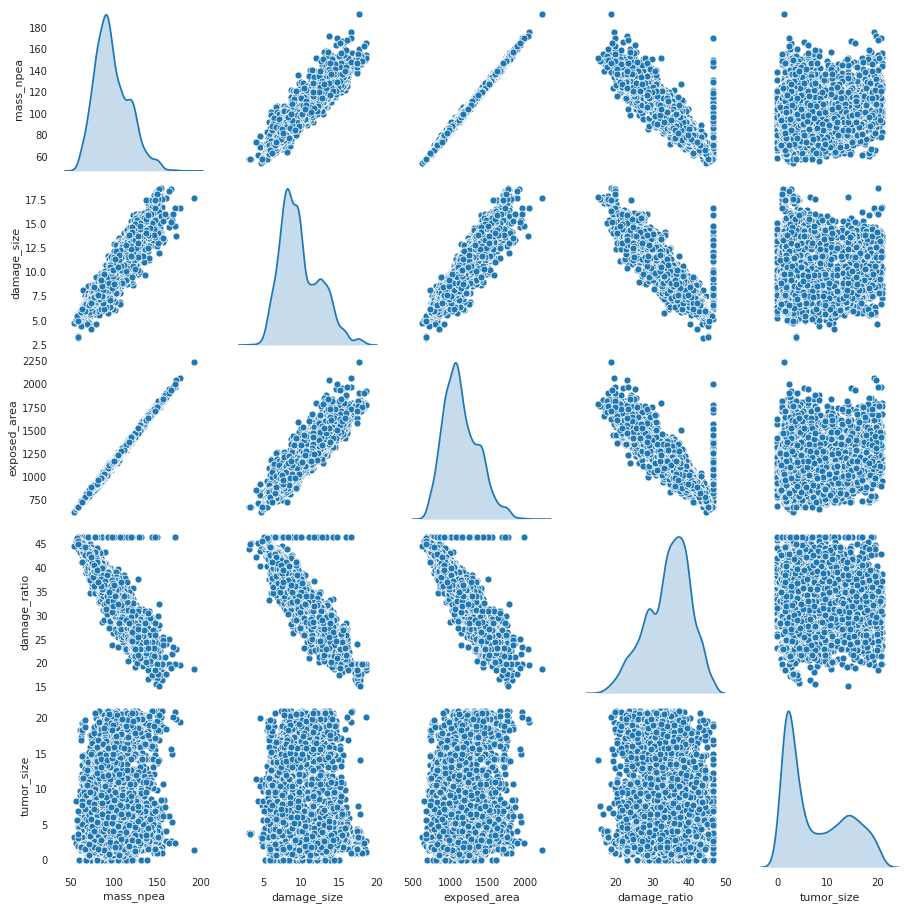

In [25]:
sns.pairplot(melanoma_training_dataset[["mass_npea", "damage_size", "exposed_area", "damage_ratio", "tumor_size"]], diag_kind='kde')


* Poping Validation Feature "tumor_size"
* "tumor_size" is the target variable. Separating the target value/feature
* This label is the value that we will train the model to predict.

In [27]:
train_target_labels = melanoma_training_dataset.pop('tumor_size')

In [29]:
test_target_labels = melanoma_test_dataset.pop('tumor_size')

KeyError: ignored